# Backpropagation Walk Through
At this point I am going to take an aside to go through a thorough backpropagation walk through. For this walk through, we are going to start by looking at a single logistic neuron, then an overview of backpropagation, and then look at a specific example with numbers! 
<br><br>
## 1.1 Logistic Neurons
So to start we are going to look at a logistic neuron. This is a non-linear neuron that gives a real valued output that is a smooth and bounded function of their total input. 

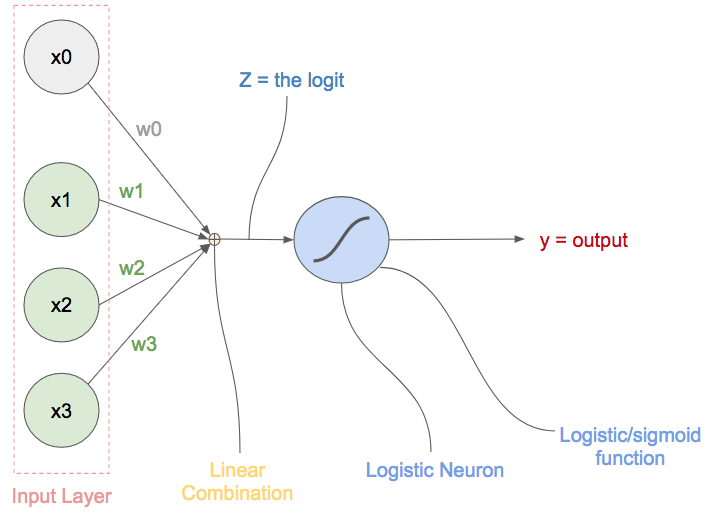

A logistic neuron computes its **logit**, which is **z**, it's total input! This is a linear combination of the bias, plus the sum over all of the input lines, of the value on an input line, $x_i$, times the weight on the input line, $w_i$. 
#### $$logit = z = b + \sum_ix_iw_i$$

It then takes that total input, the logit z, and gives an output **y**, that is a smooth nonlinear function of the logit. In this case, y is going to be the sigmoid function (logistic function), with the logit z as the input.
#### $$output = y = \frac{1}{1+e^{-z}}$$

We can see how the output **y** varies with it's input, the **logit**, **z**, below:

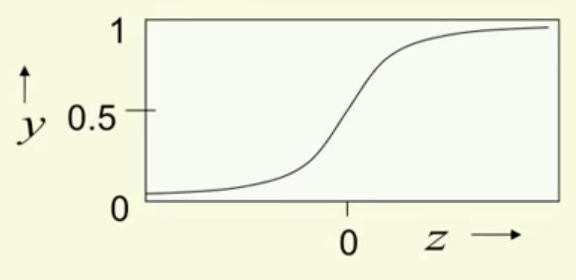

It is clear that **y** is approximately 1 when **z** is big and positive, approximately 0 when **z** is big and negative, and in between it changes smoothly and nonlinearly. The fact that it changes continuously gives it nice derivatives which make learning easy. 
<br><br>
## 1.2 Derivatives of Logistic Neuron
For this section note that our overall goal is to determine how the error between our output prediction, y, and target, t, changes as we change our weights. Why are we trying to find that? Well we want to change our weights so as to reduce the error between our predictions and targets. By finding how the change in weights effects the change in error, we can change our weights intelligently in order to make accurate predictions. So, mathematically wer are going to try and find:

#### $$\frac{\partial E}{\partial w_i}$$

In order to learn what the best weights are and make accurate predictions, we need to find out how the output, **y**, changes as we change the weights, **w**. In order to do that we will need to determine: 
1. how the logit, **z**, changes as we change a specific weight. 
2. how the output, **y**, changes as we change the logit, **z**. 

When we are trying to figure out how changing one variable effects the the change of another, we want to use derivatives in order to to do so! 
<br><br>
### 1.2.1 Derivative out Logit with respect to the weight
For number 1 above, we are trying to determine: the derivative of the logit itself, that is the total input to the logistic neuron, with respect to a weight. That is very simple to do. The logit is just a bias plus the sum over all of the input lines, of the value on the input line times the weight.

#### $$z = b + \sum_ix_iw_i$$

So when we differentiate the logit with respect to $w_i$, we end up with:

#### $$\frac{\partial z}{\partial w_i} = x_i$$

And similarly, the derivative of the logit with respect to $x_i$ is:

#### $$\frac{\partial z}{\partial x_i} = w_i$$
<br><br>
### 1.2.2 Derivative out Output with respect to the Logit
Now, for number 2 above, the derivative of the output with respect to the logit is also simple, if you express it in terms of the output! Remember, the output **y** is:

#### $$y = \frac{1}{1+e^{-z}}$$

Which we can rewrite as:

#### $$y = \frac{1}{1+e^{-z}} = (1+e^{-z})^{-1}$$

And to find the derivative of the output respect to the logit:

#### $$\frac{dy}{dz} = \frac{-1(-e^{-z})}{(1+e^{-z})^2} = \Big(\frac{1}{1+e^{-z}}\Big)\Big(\frac{e^{-z}}{1+e^{-z}}\Big)\rightarrow$$

#### $$\Big(\frac{1}{1+e^{-z}}\Big)\Big(\frac{e^{-z}}{1+e^{-z}}\Big) = y\Big(\frac{e^{-z}}{1+e^{-z}}\Big) \rightarrow$$

And we can find that:

#### $$\Big(\frac{e^{-z}}{1+e^{-z}}\Big) = \frac{(1+e^{-z})-1}{1+e^{-z}} = \frac{(1+e^{-z})}{1+e^{-z}}-\frac{1}{1+e^{-z}}$$

Where:

#### $$\frac{(1+e^{-z})}{1+e^{-z}}-\frac{1}{1+e^{-z}} = 1-y$$

Hence, if we plug in $1-y$ to the following equation:

#### $$y\Big(\frac{e^{-z}}{1+e^{-z}}\Big) = y(1-y)$$

We end up with a final derivative of:

#### $$\frac{dy}{dz} = y(1-y)$$
<br><br>
### 1.2.3 Derivative of Output with respect to the Weights
Now that we have the derivative of the output with respect to the logit, and the derivative of the logit with respect to the weight, we can start to figure out the derivative of the output with respect to the weight! That is the big thing that we are trying to find right now: **how does our output, y, change as we change our weights?** The best way to do this is using the chain rule!

So, the chain rule states that in order to find the derivative of the output with respect to the weights, we need to find:

#### $$\frac{\partial y}{\partial w_i} = \frac{\partial z}{\partial w_i}\frac{dy}{dz}$$

Since we have already found both $\frac{\partial z}{\partial w_i}$ and $\frac{dy}{dz}$, we can plug them in to get our result of:

#### $$\frac{\partial y}{\partial w_i} = x_iy(1-y)$$

The last thing we need to find is how our error changes with respect to our output...
<br><br>
### 1.2.4 Derivative of Error with respect to the Output
When we change our output, we change the amount of error in our prediction. One basic equation for error is that of least squares:

#### $$Error = E = \frac{1}{2}\sum_{n \in training}(t^n - y^n)^2$$

This is equal to our squared residuals, summed over all training cases. In other words, it is the squared difference between the target, and what the neural net predicts, over all of the training cases. The half used to cancel the 2 when we differentiate. With that definition of error in mind, we want to find how the error changes as we change the output:

#### $$\frac{\partial E}{\partial y} = -\sum_n(t^n-y^n)$$
<br><br>
### 1.2.5 Derivative of the Error with respect to the Weights
We now have everyting we need to find the learning rule for a logistic neuron! Since we are trying to determine how the error changes as we change a weight our overall equation will look like:

#### $$\frac{\partial E}{\partial w_i} = \sum_n\frac{\partial E}{\partial y^n}\frac{\partial y^n}{\partial w^i} = -\sum_nx_i^ny^n(1-y^n)(t^n-y^n) $$

This represents the sum over all of the training cases, n, of the value on an input line $x_i^n$, times the residual (the difference between the target and the output), times $y^n(1-y^n)$, which comes from the slope over the logistic function. 

---

<br></br>
# 2 Backpropagation Algorithm 
At this point it is useful to understand what the main purpose of backpropagation is, and why it is necessary. First and foremost, networks without hidden units are very limited in the input-output mappings they can model. If you add a layer of hand coded features, you can make the network much more powerful, but it is difficult and time consuming to design those features. As a note, here is what hidden units look like:

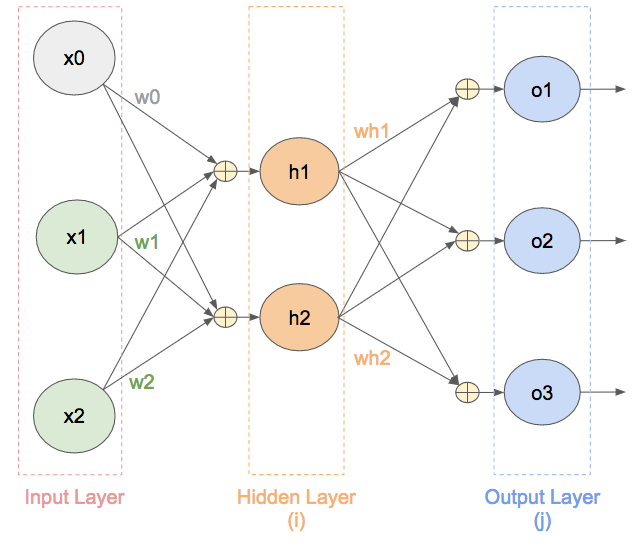

What we would ideally want, is a way of finding good features, without requiring insights into the task, or repeated trial and error where we guess some features and see how well they work. What we need is essentially to automate the loop of designing features for a particular task and seeing how well they work. 
<br><br>
## 2.1 The Idea behind Backpropagation

The main idea behind back propagation is that we don't know what the hidden units ought to be doing-they are called hidden units because no body is telling us what there states ought to be-but we can compute how fast the error changes as we change the activity on a particular training case. 

So, instead of using the activities of the hidden units as the desired states, we use the error derivatives with respect to activities. Since each hidden unit can effect many different output units, it can have many different effects on the error. **These effects must be combined**. 

Once we have the error derivatives for the hidden units- that is **we know how fast the error changes as we change the hidden activity on that particular training case**- it is easy to convert those error derivatives for the activities, into error derivatives for the weights coming into a hidden unit. 

<br><br>
## 2.2 Sketch of Backpropagation on single training case 
First we are going to need to define the error at the output, and in this case we are going to define it as being the squared difference between the target values of the output unit $j$, and the actual values that the net produces for the output unit $j$. 

#### $$Error = E = \frac{1}{2}\sum_{j \in output}(t_j - y_j)^2$$

We can see in the diagram below that there are 3 output units. 

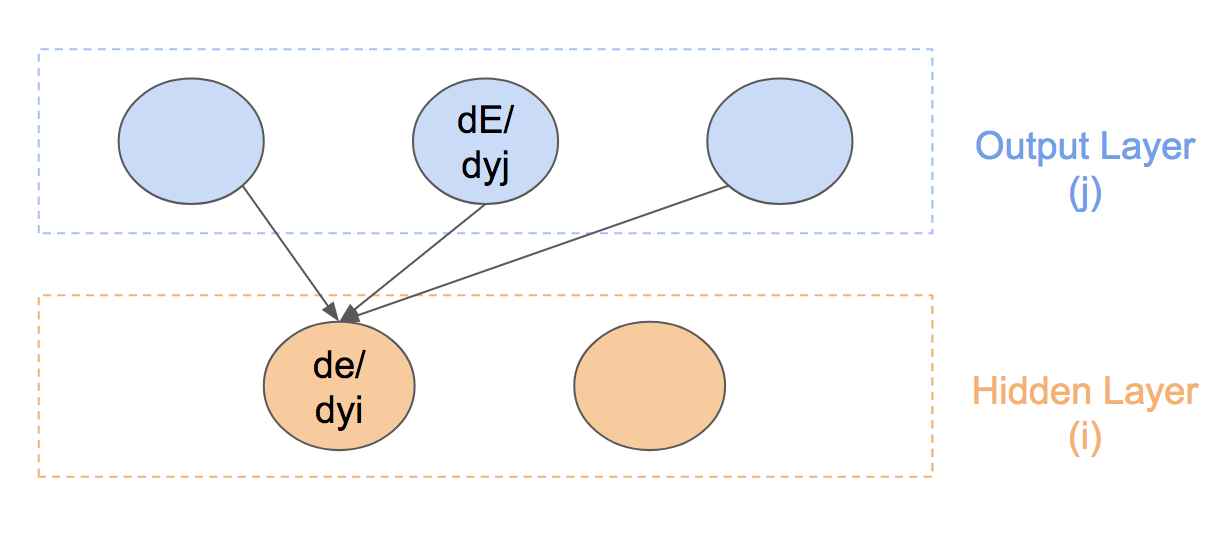

We then differentiate that error with respect to the output, y. We end up with a familiar expression, which is how the error changes as you change the activity of an output unit, j. 

#### $$\frac{\partial E}{\partial y_j} = -\sum_n(t_j-y_j)$$

Note: we are going to use a notation where the index on a unit tells us which layer we are in. So the output unit has a typical index of **j**, and the layer in front of that - the hidden layer below it - will have a typical index of **i**. 

So once we have the error derivative with respect to one of the output units (the middle unit in our example), when then want to use all of the error derivatives in the output layer, to compute the same quantity in the hidden layer that comes before the output layer. 

<br><br>
## 2.3 Core Idea of Backpropagation
The core idea behind backprogation is **to take the error derivatives in one layer, and from them computing the error derivatives in the layer that comes before that.** Now, obviously when we change the output of unit **i**, it will change the activities of **all three** output units! So we must sum up all of those effects. 

Our algorithm must take error derivatives that we have already computed for the top layer, **j**, and combine them using the same weights that we had used in the forward pass, in order to get error derivatives in the layer below, **i**. 

<br><br>
## 2.4 Backpropagate $\frac{dE}{dy}$
Here we are really going to dive into the back propagation algorithm, and it is essential to really understand what is happening here. The goal is to fully understand how to backpropagate the error derivative, with respect to the output of a unit. 

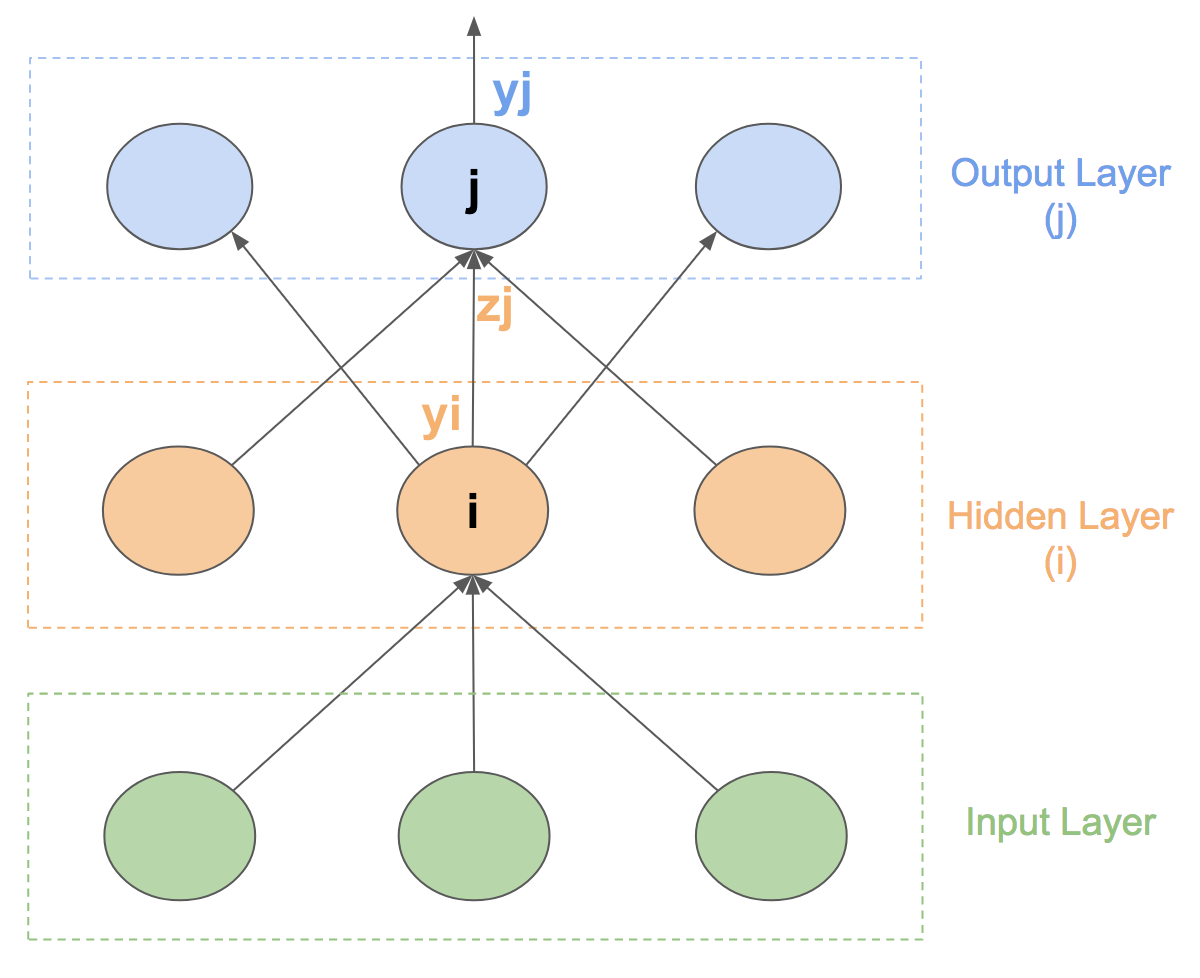

We are going to consider:
> 
* an output unit $j$
* a hidden unit $i$
* the output of the hidden unit $i$ will be $y_i$
* the output of the output unit $j$ will be $y_j$
* the total input received by the output unit $j$ will be $z_j$
* The equation for **error** is:
#### $$Error = E = \frac{1}{2}\sum_{j \in output}(t_j - y_j)^2$$
* The equation for the **outpu**t, $y$ is:
#### $$y = \frac{1}{1+e^{-z}}$$
* The equation for the **logit**, $z$, is:
#### $$z = b + \sum_ix_iw_i$$

<br></br>
### 2.4.1 Error derivative with respect to $z_j$
Our first step is that we need to convert the error derivative with respect to $y_j$, into the error derivative with respect to $z_j$. To do that we use the chain rule. 

#### $$\frac{\partial E}{\partial z_j} = \frac{d y_j}{d z_j}\frac{\partial E}{\partial y_j} = y_j(1-y_j)\frac{\partial E}{\partial y_j}$$

We already know from our prior derivations that:

#### $$\frac{d y_j}{d z_j} = y_j(1-y_j)$$ 

And, we also know that:

#### $$\frac{\partial E}{\partial y_j} = -\sum_n(t_j-y_j)$$

Which is the error derivative, with respect to the output of unit $j$. At this point we have the total error derivative with respect to the total input received by unit $j$ ($z_j$). Simply put, we know how the error will change as we change the total input to unit $j$. 

<br></br>
### 2.4.2 Error derivative with respect to $y_i$
Now we can compute the error derivative with respect to the output of unit $i$. It is going to be the sum over all three of the outgoing connections of unit $i$, of how the total input to unit $j$ changes as we change the output of unit $i$, times how the error changes as we change the input to unit $j$.

#### $$\frac{\partial E}{\partial y_i} = \sum_j \frac{dz_j}{dy_i}\frac{\partial E}{\partial z_j} = \sum_jw_{ij}\frac{\partial E}{\partial z_j}$$

We calculated $\frac{\partial E}{\partial z_j}$ in in the previous step, and we know that $\frac{dz_j}{dy_i}$ is just equal to $w_{ij}$ (the weight on the connection), since we derived it earlier. 

So what we get is that the error derivative with respect to the output of unit $i$, is the sum over all of the outgoing connections to the layer above, of the weight, $w{ij}$, on that connection, times a quantity that we already know, $\frac{\partial E}{\partial z_j}$ for the layer above. 

Note: The reason that we sum over all three of the outgoing connection from unit $i$ is because all three of the output nodes are dependent upon $y_i$. By changing $y_i$, we will change the output of each node in layer $j$, and hence change the error, $E$. We need to account for all of those effects. 

<br></br>
### 2.4.3 Error derivative with respect to $w_{ij}$
Once we have $\frac{\partial E}{\partial z_j}$, which we computed in 2.4.1, it is very easy to get the error derivatives for all of the weights coming into unit $j$. 

#### $$\frac{\partial E}{\partial w{ij}} = \frac{\partial z_j}{\partial w_{ij}} \frac{\partial E}{\partial z_j} = y_i\frac{\partial E}{\partial z_j}$$

We already have computed $\frac{\partial E}{\partial z_j}$, and we multiply that times how $z_j$ changes as we change the weight on the connection, which is simply the activity of the unit in the layer below, $y_i$.

So the rule for changing a weight is that you multiply this quantity that you have computed at a unit, $\frac{\partial E}{\partial z_j}$, by the activity coming in from the layer below. That gives you the error derivative with respect to the weight. 

<br></br>
### 2.4.4 Overview
So in 2.4 we have seen how we can start with $\frac{\partial E}{\partial y_j}$, and backpropagate to get $\frac{\partial E}{\partial y_i}$. We have gone backwards one layer, and computed the same quantity, the derivative of the error with respect to the output in the previous layer. We can clearly do this for as many layers as we like! And after we have done that for all of these layers, we can compute **how the error changes as you changes the weights on the connections**. That is the back propagation algorithm! It is an algorithm for taking one training case, and computing, efficiently, for every weight in the network, how the error will change (on that particular training case), as you change the weight. 

---

<br></br>
# 3.0 Backpropagation Full Example
We are going to look at an in depth example of backpropagation using a neural network that consists of: 
> * two input units 
* two hidden neurons 
* two output neurons 
* a bias for both the hidden and output neurons 

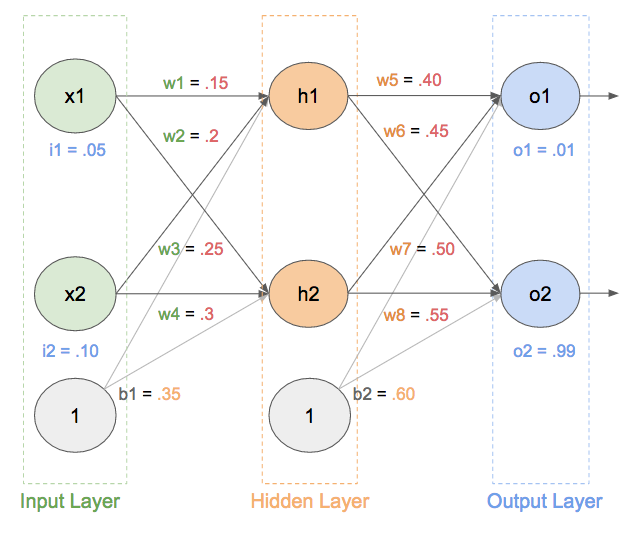

The initial weights, biases, and training inputs and outputs are labeled on the diagram. The entire goal of backpropagation is to optimize the weights so taht the neural network can learn how to correctly map inputs to outputs. 

For the rest of this example we are going to work with a single training example (generally we have hundreds or thousands of training examples. Given inputs of **0.05** and **0.10**, we want the neural network to output **0.01** and **0.99**. 

<br></br>
## 3.1 The Forward Pass
To being, we want to determine what the neural network predicts currently, given the weights and biases above and inputs of 0.05 and 0.10. To do this we will feed the inputs forward through the network. 

We want to figure out the **total net input** to each hidden layer neuron (the **logit**, $z$), then squash the total net input in our output using an **activation function** (in this case we use the **logistic function**, or the **sigmoid**). At this point the output $y$, can be fed in as the input to **our output layer**. 

<br></br>
### 3.1.1 Net *input* for hidden unit 1
Lets start by finding the the net input into hidden unit 1, the logit, $z_{h1}$. It is a linear combination of the weights times the inputs into the units, plus the bias.

#### $$z_{h1} = w_1x1+w_2x_2+b_1*1$$
#### $$z_{h1} = 0.15*0.05+0.2*0.1+0.35*1 = 0.3775$$

<br></br>
### 3.1.2 Net *output* for hidden unit 1
In order to get the output of hidden unit 1, we must now take the input we just calculated, and run it through the logistic function.

#### $$y_{h1} = \frac{1}{1+e^{-z_{h1}}} = \frac{1}{1+e^{-0.3775}} = 0.593269992$$

<br></br>
### 3.1.3 Net *input* for hidden unit 2
Repeating the same process as we went through for hidden unit 1:
#### $$z_{h2} = w_3x_1+w_4x_2+b_1*1$$
#### $$z_{h2} = 0.25*0.05+0.3*0.1+0.35*1 = 0.3925$$

<br></br>
### 3.1.4 Net *output* for hidden unit 2
Repeating the same process as we went through for hidden unit 1:

#### $$y_{h2} = \frac{1}{1+e^{-z_{h2}}} = \frac{1}{1+e^{-0.3925}} = 0.596884378$$

We now are going to repeat this same process for the output layer.

<br></br>
### 3.1.5 Net *input* for output unit 1
#### $$z_{o1} = w_5y_{h1}+w_6y_{h2}+b_2*1$$
#### $$z_{o1} = 0.4*0.593269992 + 0.45*0.596884378 +0.6*1 = 1.105905967$$

<br></br>
### 3.1.6 Net *output* for output unit 1
#### $$y_{o1} =\frac{1}{1+e^{-z_{o1}}} = \frac{1}{1+e^{-1.105905967}} = 0.75136507 $$

<br></br>
### 3.1.7 Net *output* for output unit 2
Carrying out the same process that we went through above, we find that the output of output unit 2 is:
#### $$y_{o2} = 0.772928465$$

<br></br>
## 3.2 Calculate the Total Error
At this point we have found the output predictions from each of the output nodes, 1 and 2. We are now going to need to find the total error concerning our predictions and the targets. We can calculate the error for each output neuron using the squared error function, and then sum them to get the total error. 

#### $$E_{total} = \frac{1}{2}\sum_{j \in output}(t_j - y_j)^2$$

<br></br>
### 3.2.1 Error for output unit 1
Using the above equation, we find that the error for output unit 1 is: 

#### $$E_{o1} = \frac{1}{2}(t_{o1}-y_{o1})^2 = 0.5(0.01-0.75136507)^2=0.274811083$$

<br></br>
### 3.2.2 Error for output unit 2
We can repeat the above steps to find the error at output unit 2:

#### $$E_{o2} = \frac{1}{2}(t_{o2}-y_{o2})^2 = 0.5(0.99-0.772928465)^2=0.023560026$$

<br></br>
### 3.2.3 Total error for all output units
Finally we can sum together $E_{o1}$ and $E_{o2}$ to determine the total error for the neural network:
#### $$E_{total} = \sum_jE_j = E_{o1}+E_{o2} = 0.274811083+0.023560026 = 0.298371109$$

## 3.3 Backpropagate the Error 
The entire goal of backpropagation is to update each of the weights in the network so that they cause the actual output to be closer to the target output, thereby minimizing the error for each output neuron and the network as a whole! 

<br></br>
### 3.3.1 The Output Layer
We are going to start backpropagating the error at the output layer, first focusing on weight $w_5$. We want to figure out how much a change in $w_5$ affects the total error. In other words, we want to find the derivative of total error with respect to $w_5$.

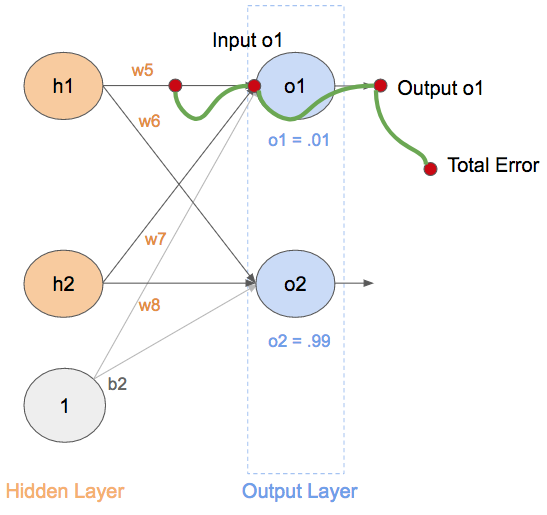

<br></br>
### 3.3.1.1 Derivative of Total Error with respect to $w_5$

#### $$\frac{\partial E_{total}}{\partial w_5}$$

We can apply the **chain rule** in order to find this! 
#### $$\frac{\partial E_{total}}{\partial w_5} = \frac{\partial E_{total}}{\partial y_{o1}}\frac{\partial y_{o1}}{\partial z_{o1}}\frac{\partial z_{o1}}{\partial w_5}$$

In words, the above equation is finding:
> * how the total error changes as we change the output of output unit 1, $y_{o1}$
* how the output of unit 1 changes as we change the input to output unit 1, $z_{o1}$
* how the input to output unit 1 changes as we change the weight $w_5$

The chain rule allows us to take these three derivatives and find how the total error changes as we change the weight $w_5$. We need to figure out each piece in the above equation. 

<br></br>
### 3.3.1.1.1 Derivative of Total Error with respect to output
Lets first figure out how much the total error changes with respect to the output of output unit 1, $y_{o1}$.
#### $$E_{total} = \frac{1}{2}(t_{o1}-y_{o1})^2 + \frac{1}{2}(t_{o2}-y_{o2})^2$$
#### $$\frac{\partial E_{total}}{\partial y_{o1}} = -1*2*\frac{1}{2}(t_{o1} - y_{o1})^{2-1}+0$$
#### $$\frac{\partial E_{total}}{\partial y_{o1}} = -1(t_{o1}-y_{o1})=-(0.01-0.75136507)=0.74136507$$

<br></br> 
### 3.3.1.1.2 Derivative of $y_{o1}$ with respect to $z_{o1}$
We now are trying to find how the output of output unit 1 changes as we change the input to output unit 1. Recall the equation for $y_{o1}$:
#### $$y_{o1} =\frac{1}{1+e^{-z_{o1}}}$$
We can now find the derivative with respect to $z_{o1}$:
#### $$\frac{\partial y_{o1}}{\partial z_{o1}} = y_{o1}(1-y_{o1}) = 0.75136507(1-0.75136507) = 0.186815602$$

<br></br>
### 3.3.1.1.3 Derivative of $z_{o1}$ with respect to $w_5$
Finally, we want to find how the total net input to the output node 1 changes, as we change $w_5$. Recall the equation for $z_{o1}$:
#### $$z_{o1} = w_5y_{h1}+w_6y_{h2}+b_2*1$$
#### $$\frac{\partial z_{o1}}{\partial w_5} = 1*y_{h_1}+0+0 = y_{h1} = 0.593269992$$

<br></br>
### 3.3.1.1.4 Combining in chain rule
We can now combine the 3 partial derivatives that we just found in order to calculate our main goal, how the total error changes as we change $w_5$.

#### $$\frac{\partial E_{total}}{\partial w_5} = \frac{\partial E_{total}}{\partial y_{o1}}\frac{\partial y_{o1}}{\partial z_{o1}}\frac{\partial z_{o1}}{\partial w_5}$$

#### $$\frac{\partial E_{total}}{\partial w_5} =0.74136507*0.186815602*0.593269992 = 0.82167041$$

<br></br>
### 3.3.1.1.5 The Delta Rule
Often, the procedure above will be combined the form of the delta rule:
#### $$\frac{\partial E_{total}}{\partial w_5} = \frac{\partial E_{total}}{\partial y_{o1}}\frac{\partial y_{o1}}{\partial z_{o1}}\frac{\partial z_{o1}}{\partial w_5}$$
#### $$\delta_{o1} = \frac{\partial E_{total}}{\partial y_{o1}}\frac{\partial y_{o1}}{\partial z_{o1}} = \frac{\partial E_{total}}{\partial y_{o1}}$$
Hence, we can write:
#### $$\frac{\partial E_{total}}{\partial w_5} = \delta_{o1}\frac{\partial z_{o1}}{\partial w_5}=\delta_{o1}y_{h1}$$

<br></br>
### 3.3.1.1.5 Updating $w_5$
Now that we have found how the total error is changed as we change $w_5$, we can subtract this value from the current value of $w_5$, and multiply if by the learning rate (here we set to 0.5).

#### $$w_5 = w5 - \alpha\frac{\partial E_{total}}{\partial w_5}$$
Since our current value for $w_5$ is 0.4, our update looks like:
#### $$w_5 = 0.4 - 0.5*0.082167041 = 0.35891648$$

<br></br>
### 3.3.1.2 Updating the remain weights
We can repeat the same process from above in order to update the remaining weights that go from the hidden layer to the output layer!

#### $$w_6 = 0.408666186$$
#### $$w_7 = 0.511301270$$
#### $$w_7 = 0.561370121$$

It is important to note that we do not perform the actual updates until the also have the updated values for $w_1$, $w_2$, $w_3$, and $w_4$. In other words, we use the original weights, not the updated ones, when we continue our backpropagation algorithm below. 

<br></br>
### 3.3.2 The Hidden Layer
At this point, we are going to continue our backpropagation of the error in order to find the weights that connect the inputs to the hidden layer, $w_1$, $w_2$, $w_3$, and $w_4$. We can start by looking at $w_1$:

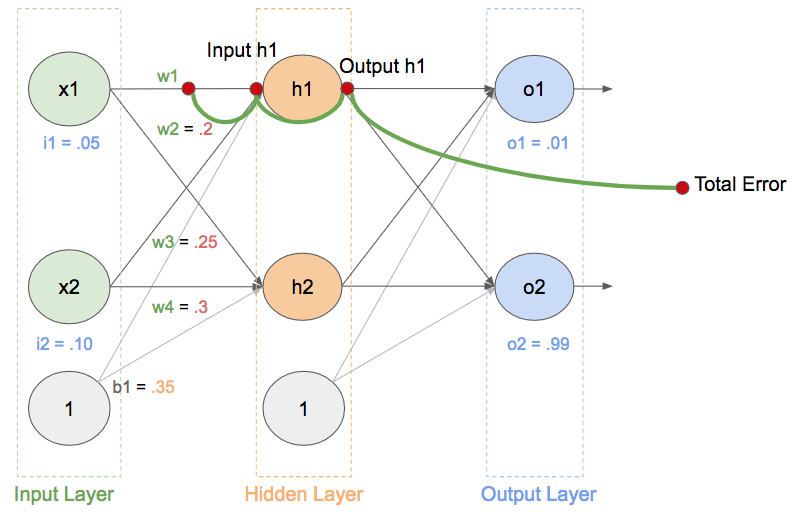

<br></br>
### 3.3.2.1 Derivative of Total Error with respect to $w_1$
Lets start by looking at $w_1$ specificaly, where we are trying to figure out how the total error changes and we change the value of $w_1$. That looks like:

#### $$\frac{\partial E_{total}}{\partial w_1} = \frac{\partial E_{total}}{\partial y_{h1}}\frac{\partial y_{h1}}{\partial z_{h1}}\frac{\partial z_{h1}}{\partial w_1}$$

<br></br>
### 3.3.2.2 Derivative of Total Error with respect to $y_{h1}$
We will use a similar process that we did for the input layer, however it will be slightly different due to the fact that each neuron in the hidden layer, $h_1$ and $h_2$, contributes to the output (and hence error) of multiple neurons (in this case $o_1$ and $o_2$). 

We know that $y_{h1}$ affects both $y_{o1}$ and $y_{o2}$, and therefore $\frac{\partial E_{total}}{\partial o_{h1}}$ needs to take into consideration its effect on both output neurons.
#### $$\frac{\partial E_{total}}{\partial y_{h1}} = \frac{\partial E_{o1}}{\partial y_{h1}}+\frac{\partial E_{o2}}{\partial y_{h1}}$$

<br></br>
### 3.3.2.3 Derivative of $E_{o1}$ with respect to $y_{h1}$
So we can first look at how the error at output unit 1 changes as we change the output of hidden unit 1. 
#### $$\frac{\partial E_{o1}}{y_{h1}}=\frac{\partial E_{o1}}{\partial z_{o1}}\frac{\partial z_{o1}}{\partial y_{h1}}$$
We can find $\frac{\partial E_{o1}}{\partial z_{o1}}$ using values that we had determined earlier!
#### $$\frac{\partial E_{o1}}{\partial z_{o1}} = \frac{\partial E_{o1}}{\partial y_{o1}}\frac{\partial y_{o1}}{\partial z_{o1}}$$
where:
#### $$\frac{\partial E_{o1}}{\partial y_{o1}} = 0.74136507$$
and:
#### $$\frac{\partial y_{o1}}{\partial z_{o1}} = 0.186815602$$
So:
#### $$\frac{\partial E_{o1}}{\partial z_{o1}}= 0.74136507*0.186815602 = 0.138498562$$
Which means our equation now for $\frac{\partial E_{o1}}{y_{h1}}$ now looks like:
#### $$\frac{\partial E_{o1}}{y_{h1}}=0.138498562*\frac{\partial z_{o1}}{\partial y_{h1}}$$
And since $\frac{\partial z_{o1}}{\partial y_{h1}}$ is simply:
#### $$\frac{\partial z_{o1}}{\partial y_{h1}} = w_5 = 0.40$$
The finally value we calculate is:
#### $$\frac{\partial E_{o1}}{y_{h1}}=\frac{\partial E_{o1}}{\partial z_{o1}}\frac{\partial z_{o1}}{\partial y_{h1}}=0.138498562*0.40=0.055399425$$

<br></br>
### 3.3.2.4 Derivative of $E_{o2}$ with respect to $y_{h1}$
Now lets follow this same process in order to find how the error at output unit 2 changes as we change the output of hidden unit 1:
#### $$\frac{\partial E_{o2}}{y_{h1}}=\frac{\partial E_{o2}}{\partial z_{o2}}\frac{\partial z_{o2}}{\partial y_{h1}}$$

Lets first try and determine $\frac{\partial E_{o2}}{\partial z_{o2}}$. We know that it can be defined as:
#### $$\frac{\partial E_{o2}}{\partial z_{o2}} = \frac{\partial E_{o2}}{\partial y_{o2}}\frac{\partial y_{o2}}{\partial z_{o2}}$$
We have not yet written out the calculation for $\frac{\partial E_{o2}}{\partial y_{o2}}$, so lets do that now:
#### $$E_{o2} = \frac{1}{2}(t_{o2}-y_{o2})^2$$
#### $$\frac{\partial E_{o2}}{\partial y_{o2}}= -(t_{o2}-y_{o2})=-(0.99-0.772928465) = -0.21707153499999998$$
And now lets solve for:
#### $$\frac{\partial y_{o2}}{\partial z_{o2}} = y_{o2}(1-y_{o2})$$
#### $$\frac{\partial y_{o2}}{\partial z_{o2}} = 0.772928465(1-0.772928465) = 0.17551005299274378$$
So, we can combine those in order to find:
#### $$\frac{\partial E_{o2}}{\partial z_{o2}}= -0.21707153499999998*0.17551005299274378 = -0.03809823661106623$$
Which means that the last remaining piece we need to solve for is $\frac{\partial z_{o2}}{\partial y_{h1}}$:
#### $$z_{o2} = w_7*y_{h1}+w_8*y_{h2}+b_2*1$$
#### $$\frac{\partial z_{o2}}{\partial y_{h1}}= w_7=0.5$$
And our final result for how the error changes at output node 2 with respect to the output from hidden unit 1 is:
#### $$\frac{\partial E_{o2}}{y_{h1}} = -0.03809823661106623*0.50 = -0.019049118305533116$$

<br></br>
### 3.3.2.5 Combine to find Derivative of Total Error with respect to $y_{h1}$
Take a quick second to remember that we are trying to find how the total error changes as we change $y_{h1}$, the output of hidden unit 1. Because the output of hidden unit 1 is fed forward into both output nodes, we need to figure out how it affects the error at **each** output node. We defined that as:

#### $$\frac{\partial E_{total}}{\partial y_{h1}} = \frac{\partial E_{o1}}{\partial y_{h1}}+\frac{\partial E_{o2}}{\partial y_{h1}}$$
Plugging in the values we previously we found, we end up with a result of:
#### $$\frac{\partial E_{total}}{\partial y_{h1}}=0.055399425+-0.019049118305533116=- 0.036350306$$

<br></br>
### 3.3.2.6 Derivative of $y_{h1}$ with respect to $z_{h1}$
Lets look back at the main equation we are trying to solve right now:

#### $$\frac{\partial E_{total}}{\partial w_1} = \frac{\partial E_{total}}{\partial y_{h1}}\frac{\partial y_{h1}}{\partial z_{h1}}\frac{\partial z_{h1}}{\partial w_1}$$

We want to determine how the total error changes as we change the weight, $w_1$. We just solved for the first time in the equation above, lets now determine $\frac{\partial y_{h1}}{\partial z_{h1}}$:

#### $$y_{h1} =\frac{1}{1+e^{-z_{h1}}}$$
#### $$\frac{\partial y_{h1}}{\partial z_{h1}}= y_{h1}(1-y_{h1})$$
We know $y_{h1}$ from our forward pass,
#### $$\frac{\partial y_{h1}}{\partial z_{h1}}= 0.59326999(1-0.59326999) = 0.241300709$$

<br></br>
### 3.3.2.7 Derivative of $z_{h1}$ with respect to $w_1$
That last piece of the puzzle that we need to solve for is how the net input to hidden unit 1 changes as we change the value of $w_1$. 
#### $$z_{h1} = w_1*x_1+w_3*x_2+b_1*1$$
#### $$\frac{\partial z_{h1}}{\partial w_1} = x_1 = 0.05$$

<br></br>
### 3.3.2.8 Putting it all together 
We finally have all of the pieces that we need in order to determine how the total error changes as we change $w_1$!

#### $$\frac{\partial E_{total}}{\partial w_1} = \frac{\partial E_{total}}{\partial y_{h1}}\frac{\partial y_{h1}}{\partial z_{h1}}\frac{\partial z_{h1}}{\partial w_1}$$

#### $$\frac{\partial E_{total}}{\partial w_1} = -0.036350306*0.241300709*0.05 = 0.000438568$$

<br></br>

<br></br>
### 3.3.2.8.a Note about Notation
It is common to see the above calculations written as:
#### $$\frac{\partial E_{total}}{\partial w_1} = \Big(\sum_o\frac{\partial E_{total}}{\partial y_o}\frac{\partial y_o}{\partial z_o}\frac{\partial z_o}{\partial y_{h1}}\Big)\frac{\partial y_{h1}}{\partial z_{h1}}\frac{\partial z_{h1}}{\partial w_1}$$

#### $$\frac{\partial E_{total}}{\partial w_1} = \Big(\sum_o\delta_o*w_{ho}\Big)y_{h1}(1-y_{h1})*x_1$$

#### $$\frac{\partial E_{total}}{\partial w_1} = \delta_{h1}*x_1$$

### 3.3.2.9 Update $w_1$
We now have what we need in order to update $w_1$. 
#### $$w_1 = w_1 - \alpha*\frac{\partial E_{total}}{\partial w_1}$$
#### $$w_1 = 0.15 - 0.5*0.000438568 = 0.149780716$$

<br></br>
### 3.3.2.10 Update remaining weights
We can repeat the process above and end up with updated weight values of:
#### $$w_2 = 0.19956143$$
#### $$w_3 = 0.24975114$$
#### $$w_4 = 0.29950229$$

## 3.4 Second Forward Pass
At this point we have updated all of our weights! If we now perform a second forward pass, we can see that the error is down to 0.291027924. That may seem rather small, but after repeating this process 10,000 times, the error will plummet to 0.0000351085. 